In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
matches = pd.read_csv("../data/raw/matches.csv")
deliveries = pd.read_csv("../data/raw/deliveries.csv")

matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [3]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [4]:
matches.shape
deliveries.shape

(260920, 17)

In [5]:
matches.info()
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [6]:
matches.describe()
deliveries.describe()

,match_id,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket
count,2.609200e+05,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000
mean,9.070665e+05,1.483531,9.197677,3.624486,1.265001,0.067806,1.332807,0.049632
std,3.679913e+05,0.502643,5.683484,1.814920,1.639298,0.343265,1.626416,0.217184
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.483340e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,9.809670e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000
75%,1.254066e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000
max,1.426312e+06,6.000000,19.000000,11.000000,6.000000,7.000000,7.000000,1.000000


In [7]:
matches.isnull().sum()
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

In [9]:
matches.ffill(inplace=True)
deliveries.fillna(0, inplace=True)

In [10]:
matches.drop_duplicates(inplace=True)
deliveries.drop_duplicates(inplace=True)

In [11]:
player_runs = deliveries.groupby(
    ['match_id', 'batter']
)['batsman_runs'].sum().reset_index()

player_runs.head()

,match_id,batter,batsman_runs
0,335982,AA Noffke,9
1,335982,B Akhil,0
2,335982,BB McCullum,158
3,335982,CL White,6
4,335982,DJ Hussey,12


In [13]:
player_wickets = deliveries[deliveries['is_wicket'] == 1].groupby(
    ['match_id', 'bowler']
).size().reset_index(name='wickets')

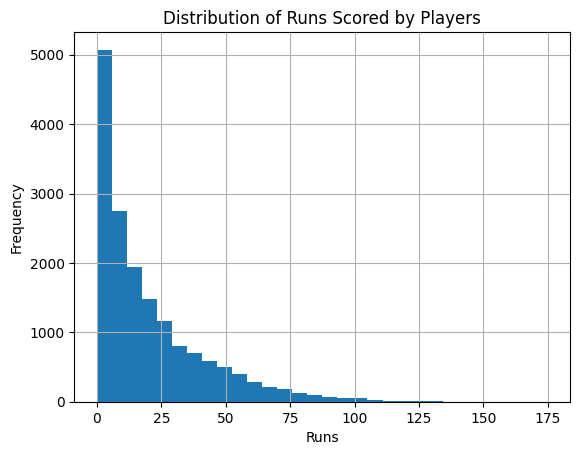

In [14]:
player_runs['batsman_runs'].hist(bins=30)
plt.title("Distribution of Runs Scored by Players")
plt.xlabel("Runs")
plt.ylabel("Frequency")
plt.show()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
matches = pd.read_csv("../data/raw/matches.csv")
deliveries = pd.read_csv("../data/raw/deliveries.csv")

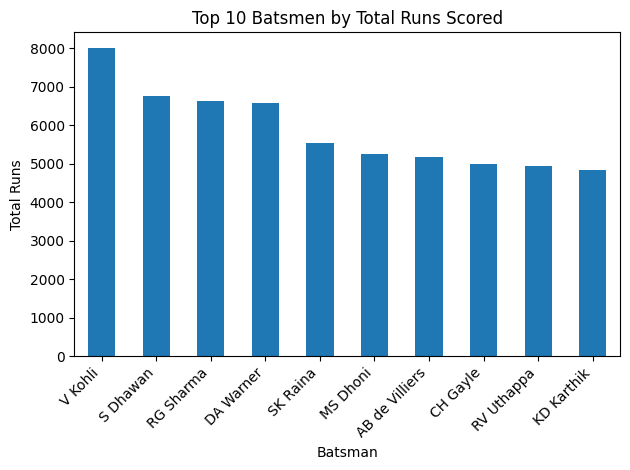

In [3]:
# Aggregate total runs scored by batsmen
runs_distribution = deliveries.groupby('batter')['batsman_runs'].sum() \
                               .sort_values(ascending=False).head(10)

# Bar chart
runs_distribution.plot(kind='bar')
plt.title("Top 10 Batsmen by Total Runs Scored")
plt.xlabel("Batsman")
plt.ylabel("Total Runs")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

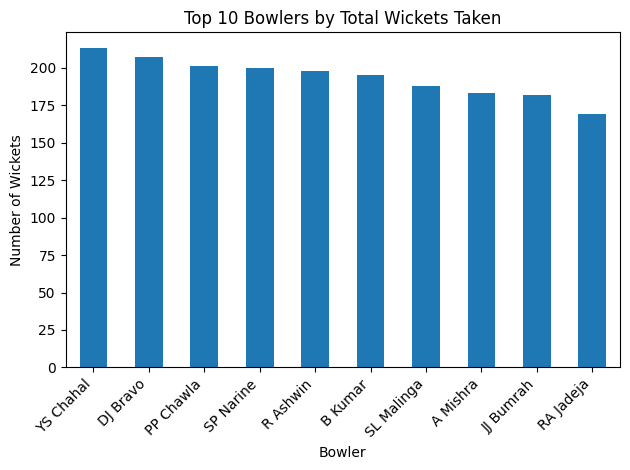

In [5]:
# Aggregate total wickets taken by bowlers
wicket_distribution = deliveries[deliveries['is_wicket'] == 1] \
    .groupby('bowler').size().sort_values(ascending=False).head(10)

# Bar chart
wicket_distribution.plot(kind='bar')
plt.title("Top 10 Bowlers by Total Wickets Taken")
plt.xlabel("Bowler")
plt.ylabel("Number of Wickets")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

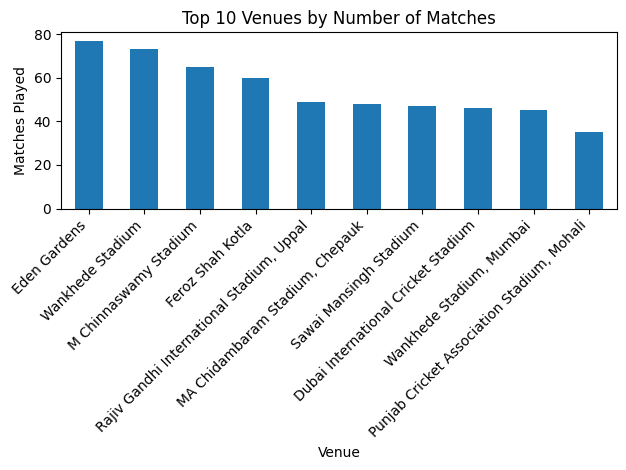

In [6]:
# Count matches played at each venue
venue_stats = matches['venue'].value_counts().head(10)

# Bar chart
venue_stats.plot(kind='bar')
plt.title("Top 10 Venues by Number of Matches")
plt.xlabel("Venue")
plt.ylabel("Matches Played")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

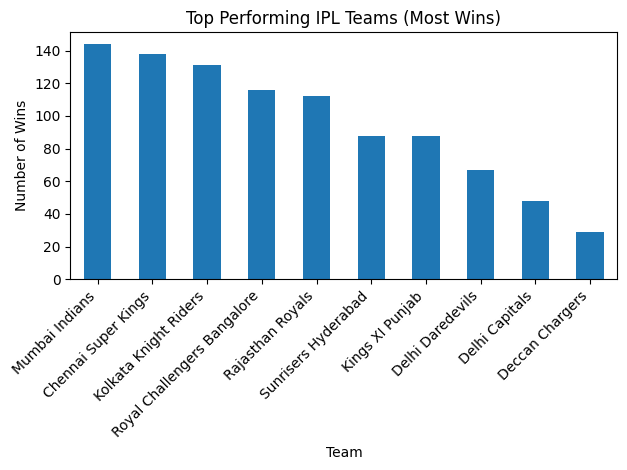

In [7]:
# Count number of wins by each team
team_performance = matches['winner'].value_counts().head(10)

# Bar chart
team_performance.plot(kind='bar')
plt.title("Top Performing IPL Teams (Most Wins)")
plt.xlabel("Team")
plt.ylabel("Number of Wins")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()